# **Experiment Notebook**



In [121]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [122]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [123]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [124]:
pip install --index-url https://test.pypi.org/simple/ my_krml_25677648==2025.0.1.8

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [126]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [127]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [128]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [129]:
business_use_case_description = """The objective of this project is to develop a robust machine learning model capable of accurately predicting the cumulative volume of precipitation, measured in millimetres, over a three-day forecast period for Sydney, Australia. The model will be trained on an extensive dataset comprising daily historical weather observations spanning from 2014 to 2024. Several regression algorithms will be implemented and rigorously evaluated to identify the most effective predictive approach. Model performance will be assessed using appropriate statistical metrics, with the best-performing model selected for deployment as an API service. This forecasting tool aims to provide end users with timely and reliable precipitation predictions, thereby facilitating data-driven decision-making in sectors that are highly sensitive to weather variability, including agriculture, logistics and event management. By integrating machine learning-based precipitation forecasting into its service infrastructure, the project will enhance the predictive capabilities and overall value proposition of the Open Meteo platform."""

In [130]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [131]:
business_objectives = """An accurate regression model for predicting rainfall volume offers significant benefits to a broad range of stakeholders. Reliable forecasts enable more effective planning and resource allocation, particularly in weather-sensitive sectors, by helping to minimise operational disruptions, reduce unnecessary expenditures, and enhance worker safety. The ability to quantify the intensity of precipitation, from light drizzles to heavy downpours, further supports more informed and context-specific decision-making. This allows organisations to adjust their responses appropriately and avoid both overpreparation and underpreparation. Moreover, precise rainfall predictions contribute to greater public awareness and readiness, especially in situations involving sudden or severe weather events. Conversely, inaccurate forecasts can result in substantial negative consequences. Overestimations may lead to avoidable delays and financial losses, while underestimations can compromise safety and limit the effectiveness of proactive measures."""

In [132]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [133]:
stakeholders_expectations_explanations = """Predictions of precipitation volume will play a critical role in supporting informed decision-making across a variety of contexts. Whether the forecast indicates light drizzle or heavy rainfall, individuals and stakeholder organisations can adjust their plans accordingly. While light rain may have minimal impact, heavy rainfall can lead to significant disruptions if not anticipated and managed proactively. For instance, individuals can use the forecasts to plan their weekends and outdoor activities, while event planners and project managers can schedule or adjust tasks to minimise weather-related interruptions. Weather-dependent industries such as agriculture, logistics and event management will benefit from these predictions by optimising operations, reducing risks, and improving safety through the avoidance of outdoor work during adverse weather conditions. The users of these forecasts include the general public, industry professionals, event organisers, and others whose activities are influenced by weather variability. Ultimately, accurate precipitation forecasts will positively impact a broad range of stakeholders by enabling better planning, reducing financial losses, minimising disruptions, and enhancing overall safety."""

In [134]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [135]:
import openmeteo_requests

import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": -33.8678,
	"longitude": 151.2073,
	"start_date": "2014-01-01",
	"end_date": "2024-12-31",
	"daily": ["temperature_2m_mean", "daylight_duration", "sunshine_duration", "temperature_2m_max", "temperature_2m_min", "et0_fao_evapotranspiration_sum", "wind_speed_10m_mean", "wind_speed_10m_min", "relative_humidity_2m_mean", "relative_humidity_2m_max", "dew_point_2m_mean", "soil_moisture_0_to_7cm_mean", "soil_moisture_28_to_100cm_mean", "soil_moisture_7_to_28cm_mean", "dew_point_2m_min", "vapour_pressure_deficit_max", "wind_gusts_10m_mean", "wind_gusts_10m_min", "relative_humidity_2m_min", "wind_direction_10m_dominant", "wind_gusts_10m_max", "wind_speed_10m_max", "cloud_cover_mean", "cloud_cover_max", "cloud_cover_min", "dew_point_2m_max", "rain_sum", "pressure_msl_mean", "pressure_msl_max", "pressure_msl_min"],
	"timezone": "auto",
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone: {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(1).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(2).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(3).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(4).ValuesAsNumpy()
daily_et0_fao_evapotranspiration_sum = daily.Variables(5).ValuesAsNumpy()
daily_wind_speed_10m_mean = daily.Variables(6).ValuesAsNumpy()
daily_wind_speed_10m_min = daily.Variables(7).ValuesAsNumpy()
daily_relative_humidity_2m_mean = daily.Variables(8).ValuesAsNumpy()
daily_relative_humidity_2m_max = daily.Variables(9).ValuesAsNumpy()
daily_dew_point_2m_mean = daily.Variables(10).ValuesAsNumpy()
daily_soil_moisture_0_to_7cm_mean = daily.Variables(11).ValuesAsNumpy()
daily_soil_moisture_28_to_100cm_mean = daily.Variables(12).ValuesAsNumpy()
daily_soil_moisture_7_to_28cm_mean = daily.Variables(13).ValuesAsNumpy()
daily_dew_point_2m_min = daily.Variables(14).ValuesAsNumpy()
daily_vapour_pressure_deficit_max = daily.Variables(15).ValuesAsNumpy()
daily_wind_gusts_10m_mean = daily.Variables(16).ValuesAsNumpy()
daily_wind_gusts_10m_min = daily.Variables(17).ValuesAsNumpy()
daily_relative_humidity_2m_min = daily.Variables(18).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(19).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(20).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(21).ValuesAsNumpy()
daily_cloud_cover_mean = daily.Variables(22).ValuesAsNumpy()
daily_cloud_cover_max = daily.Variables(23).ValuesAsNumpy()
daily_cloud_cover_min = daily.Variables(24).ValuesAsNumpy()
daily_dew_point_2m_max = daily.Variables(25).ValuesAsNumpy()
daily_rain_sum = daily.Variables(26).ValuesAsNumpy()
daily_pressure_msl_mean = daily.Variables(27).ValuesAsNumpy()
daily_pressure_msl_max = daily.Variables(28).ValuesAsNumpy()
daily_pressure_msl_min = daily.Variables(29).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["et0_fao_evapotranspiration_sum"] = daily_et0_fao_evapotranspiration_sum
daily_data["wind_speed_10m_mean"] = daily_wind_speed_10m_mean
daily_data["wind_speed_10m_min"] = daily_wind_speed_10m_min
daily_data["relative_humidity_2m_mean"] = daily_relative_humidity_2m_mean
daily_data["relative_humidity_2m_max"] = daily_relative_humidity_2m_max
daily_data["dew_point_2m_mean"] = daily_dew_point_2m_mean
daily_data["soil_moisture_0_to_7cm_mean"] = daily_soil_moisture_0_to_7cm_mean
daily_data["soil_moisture_28_to_100cm_mean"] = daily_soil_moisture_28_to_100cm_mean
daily_data["soil_moisture_7_to_28cm_mean"] = daily_soil_moisture_7_to_28cm_mean
daily_data["dew_point_2m_min"] = daily_dew_point_2m_min
daily_data["vapour_pressure_deficit_max"] = daily_vapour_pressure_deficit_max
daily_data["wind_gusts_10m_mean"] = daily_wind_gusts_10m_mean
daily_data["wind_gusts_10m_min"] = daily_wind_gusts_10m_min
daily_data["relative_humidity_2m_min"] = daily_relative_humidity_2m_min
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["cloud_cover_mean"] = daily_cloud_cover_mean
daily_data["cloud_cover_max"] = daily_cloud_cover_max
daily_data["cloud_cover_min"] = daily_cloud_cover_min
daily_data["dew_point_2m_max"] = daily_dew_point_2m_max
daily_data["rain_sum"] = daily_rain_sum
daily_data["pressure_msl_mean"] = daily_pressure_msl_mean
daily_data["pressure_msl_max"] = daily_pressure_msl_max
daily_data["pressure_msl_min"] = daily_pressure_msl_min

df = pd.DataFrame(data = daily_data)

Coordinates: -33.84885787963867°N 151.1955108642578°E
Elevation: 51.0 m asl
Timezone: b'Australia/Sydney'b'GMT+10'
Timezone difference to GMT+0: 36000s


In [136]:
from my_krml_25677648.data.sets import eda_summary

In [137]:
# Explore df
eda_summary(df)

HEAD (First 5 Rows)

                       date  temperature_2m_mean  daylight_duration  \
0 2013-12-31 14:00:00+00:00            22.197580       51688.320312   
1 2014-01-01 14:00:00+00:00            24.607996       51655.121094   
2 2014-01-02 14:00:00+00:00            21.947584       51619.085938   
3 2014-01-03 14:00:00+00:00            21.497583       51580.242188   
4 2014-01-04 14:00:00+00:00            22.468416       51538.632812   

   sunshine_duration  temperature_2m_max  temperature_2m_min  \
0       36944.875000           25.870499           19.070499   
1       23192.041016           33.320499           21.020500   
2       27951.164062           24.570499           20.220501   
3       48363.488281           24.270500           19.570499   
4       48069.636719           26.370499           19.220501   

   et0_fao_evapotranspiration_sum  wind_speed_10m_mean  wind_speed_10m_min  \
0                        5.013660             9.695022            1.938659   
1          

### C.2 Define Target variable

In [138]:
# Create the target variable: Cumulated volume of precipitation fall in mm within the next 3 days time in Sydney
df['precipitation_fall'] = df['rain_sum'].shift(-1) + df['rain_sum'].shift(-2) + df['rain_sum'].shift(-3)

In [139]:
# Last 10 rows of df
df.tail(10)

,date,temperature_2m_mean,daylight_duration,sunshine_duration,temperature_2m_max,temperature_2m_min,et0_fao_evapotranspiration_sum,wind_speed_10m_mean,wind_speed_10m_min,relative_humidity_2m_mean,...,wind_speed_10m_max,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_max,rain_sum,pressure_msl_mean,pressure_msl_max,pressure_msl_min,precipitation_fall
4008,2024-12-21 14:00:00+00:00,22.035416,51860.664062,29436.945312,24.887499,19.837500,4.289347,11.684125,1.835647,72.921722,...,22.609177,63.791668,100.0,3.0,20.887499,0.2,1006.137451,1010.299988,1001.200012,0.0
4009,2024-12-22 14:00:00+00:00,22.908333,51856.140625,48617.746094,28.937500,18.287500,6.802649,11.640549,2.167487,58.926105,...,21.791153,34.000000,100.0,0.0,20.887499,0.0,1001.937500,1008.099976,998.299988,0.0
4010,2024-12-23 14:00:00+00:00,19.808332,51848.464844,48610.832031,22.537500,15.837500,6.487644,12.891021,5.983477,47.542118,...,22.732082,5.791667,89.0,0.0,12.937500,0.0,1011.550049,1015.700012,1007.700012,0.8
4011,2024-12-24 14:00:00+00:00,21.368750,51837.652344,48601.023438,27.187500,16.137499,6.146514,9.999595,1.988165,64.223015,...,20.690605,0.916667,8.0,0.0,17.687500,0.0,1015.845886,1017.700012,1014.200012,1.7
4012,2024-12-25 14:00:00+00:00,22.552084,51823.750000,48000.613281,27.037500,16.837500,6.264203,15.707917,2.052316,74.374580,...,28.227304,13.125000,99.0,0.0,18.787500,0.0,1011.941711,1016.299988,1007.099976,1.7
4013,2024-12-26 14:00:00+00:00,26.202085,51806.777344,33789.968750,35.187500,20.887499,6.296452,16.679815,8.211235,57.966953,...,24.012972,43.500000,100.0,0.0,19.487499,0.8,1003.516663,1007.299988,1000.500000,1.2
4014,2024-12-27 14:00:00+00:00,21.352081,51786.785156,48554.492188,24.037500,18.587500,5.180197,12.241256,7.486788,70.346695,...,20.170443,33.875000,96.0,0.0,17.037500,0.9,1009.345947,1011.400024,1007.200012,0.3
4015,2024-12-28 14:00:00+00:00,22.214584,51763.792969,48533.378906,27.887499,16.937500,6.468780,10.361734,3.054701,63.680096,...,17.727943,7.166667,44.0,0.0,17.387499,0.0,1014.200012,1018.500000,1011.000000,NaN
4016,2024-12-29 14:00:00+00:00,22.462500,51737.851562,48509.531250,25.587500,19.737499,5.375723,12.572087,8.936778,70.827507,...,18.252037,41.833332,100.0,6.0,18.387499,0.3,1017.649963,1020.500000,1015.099976,NaN
4017,2024-12-30 14:00:00+00:00,22.993752,51708.988281,42930.703125,26.487499,18.737499,5.312834,9.582100,1.310420,74.040428,...,14.934577,60.375000,100.0,0.0,18.937500,0.0,1014.466614,1015.700012,1013.099976,NaN


In [140]:
# Drop rows where 'precipitation_fall' is null
df.dropna(subset=['precipitation_fall'], inplace=True)

In [141]:
# Last 10 rows of df
df.tail(10)

,date,temperature_2m_mean,daylight_duration,sunshine_duration,temperature_2m_max,temperature_2m_min,et0_fao_evapotranspiration_sum,wind_speed_10m_mean,wind_speed_10m_min,relative_humidity_2m_mean,...,wind_speed_10m_max,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_max,rain_sum,pressure_msl_mean,pressure_msl_max,pressure_msl_min,precipitation_fall
4005,2024-12-18 14:00:00+00:00,20.035418,51854.968750,48615.898438,22.687500,17.787500,5.528263,15.245507,9.224011,60.617496,...,20.696869,47.625000,99.0,5.0,13.737499,0.2,1017.699951,1019.400024,1016.099976,0.7
4006,2024-12-19 14:00:00+00:00,19.704168,51860.105469,48620.832031,23.187500,15.387500,5.755971,9.855006,1.808978,65.657463,...,15.227830,13.125000,71.0,0.0,16.037500,0.0,1012.229187,1015.799988,1009.099976,0.7
4007,2024-12-20 14:00:00+00:00,21.762499,51861.992188,48622.777344,29.037500,15.837500,5.834490,9.155691,3.107282,70.268272,...,16.856689,19.916666,100.0,0.0,17.687500,0.5,1008.329102,1010.900024,1006.200012,0.2
4008,2024-12-21 14:00:00+00:00,22.035416,51860.664062,29436.945312,24.887499,19.837500,4.289347,11.684125,1.835647,72.921722,...,22.609177,63.791668,100.0,3.0,20.887499,0.2,1006.137451,1010.299988,1001.200012,0.0
4009,2024-12-22 14:00:00+00:00,22.908333,51856.140625,48617.746094,28.937500,18.287500,6.802649,11.640549,2.167487,58.926105,...,21.791153,34.000000,100.0,0.0,20.887499,0.0,1001.937500,1008.099976,998.299988,0.0
4010,2024-12-23 14:00:00+00:00,19.808332,51848.464844,48610.832031,22.537500,15.837500,6.487644,12.891021,5.983477,47.542118,...,22.732082,5.791667,89.0,0.0,12.937500,0.0,1011.550049,1015.700012,1007.700012,0.8
4011,2024-12-24 14:00:00+00:00,21.368750,51837.652344,48601.023438,27.187500,16.137499,6.146514,9.999595,1.988165,64.223015,...,20.690605,0.916667,8.0,0.0,17.687500,0.0,1015.845886,1017.700012,1014.200012,1.7
4012,2024-12-25 14:00:00+00:00,22.552084,51823.750000,48000.613281,27.037500,16.837500,6.264203,15.707917,2.052316,74.374580,...,28.227304,13.125000,99.0,0.0,18.787500,0.0,1011.941711,1016.299988,1007.099976,1.7
4013,2024-12-26 14:00:00+00:00,26.202085,51806.777344,33789.968750,35.187500,20.887499,6.296452,16.679815,8.211235,57.966953,...,24.012972,43.500000,100.0,0.0,19.487499,0.8,1003.516663,1007.299988,1000.500000,1.2
4014,2024-12-27 14:00:00+00:00,21.352081,51786.785156,48554.492188,24.037500,18.587500,5.180197,12.241256,7.486788,70.346695,...,20.170443,33.875000,96.0,0.0,17.037500,0.9,1009.345947,1011.400024,1007.200012,0.3


In [142]:
target_definition_explanations = """This project aims to develop a predictive model to estimate the cumulative volume of precipitation in millimetres over a three-day forecast horizon. To support this objective, a new target variable, precipitation_fall, is constructed to represent the total amount of precipitation expected over the three days following each observation date. This target serves as the output for a regression model trained on historical weather data.
"""

In [143]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [144]:
target_name = 'precipitation_fall'

### C.4 Explore Target variable

In [145]:
from my_krml_25677648.data.sets import explore_feature_summary

In [146]:
# Missing values, duplicates and unique values
explore_feature_summary('precipitation_fall', df)

{'Missing values': np.int64(0),
 'Duplicate values': np.int64(3160),
 'Unique values count': 855,
 'Unique values (sample)': array([0.90000004, 1.        , 0.2       , 0.8       , 2.6000001 ,
        3.        , 4.        , 2.1       , 1.5999999 , 0.        ],
       dtype=float32)}

In [147]:
# Summary statistics of precipitation_fall
df['precipitation_fall'].describe()

count    4015.000000
mean        7.760473
std        15.653054
min         0.000000
25%         0.200000
50%         2.100000
75%         8.100000
max       203.700012
Name: precipitation_fall, dtype: float64

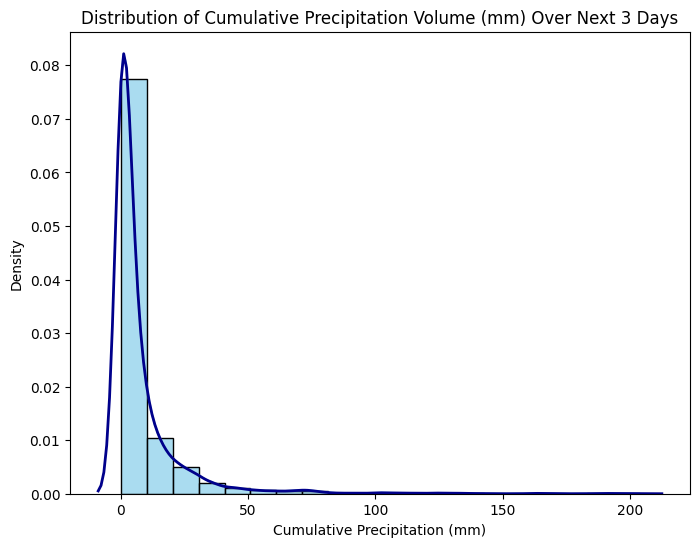

In [148]:
plt.figure(figsize=(8, 6)) 

sns.histplot(
    df['precipitation_fall'], 
    bins=20,                  
    kde=True, 
    color='skyblue',         
    stat='density',           
    alpha=0.7,              
)

# KDE styling
sns.kdeplot(
    df['precipitation_fall'], 
    color='darkblue', 
    linewidth=2
)

plt.title('Distribution of Cumulative Precipitation Volume (mm) Over Next 3 Days')
plt.xlabel('Cumulative Precipitation (mm)')
plt.ylabel('Density')
plt.show()

In [149]:
# Create bins
bins = pd.cut(df['precipitation_fall'], bins=20)

# Create a frequency table by counting how many fall into each bin
freq_table = bins.value_counts().sort_index().reset_index()
freq_table.columns = ['Precipitation Range (mm)', 'Count']

# Calculate percentage of total for each bin
freq_table['Percentage (%)'] = (freq_table['Count'] / freq_table['Count'].sum()) * 100

print(freq_table)

   Precipitation Range (mm)  Count  Percentage (%)
0          (-0.204, 10.185]   3166       78.854296
1           (10.185, 20.37]    422       10.510585
2           (20.37, 30.555]    202        5.031133
3           (30.555, 40.74]     84        2.092154
4           (40.74, 50.925]     43        1.070984
5           (50.925, 61.11]     25        0.622665
6           (61.11, 71.295]     20        0.498132
7           (71.295, 81.48]     21        0.523039
8           (81.48, 91.665]      5        0.124533
9          (91.665, 101.85]      5        0.124533
10        (101.85, 112.035]      6        0.149440
11        (112.035, 122.22]      3        0.074720
12        (122.22, 132.405]      6        0.149440
13        (132.405, 142.59]      2        0.049813
14        (142.59, 152.775]      0        0.000000
15        (152.775, 162.96]      1        0.024907
16        (162.96, 173.145]      1        0.024907
17        (173.145, 183.33]      0        0.000000
18        (183.33, 193.515]    

In [150]:
target_distribution_explanations = """Based on the summary statistics, about 75% of the observations show a cumulative precipitation fall of up to 8.1 mm over the three-day period. Additionally, approximately 80% of the data records precipitation volumes within the 0–10 mm range. This strong concentration of data points in the lower precipitation values indicates a significant class imbalance and a right-skewed distribution. As a result, the predictive model may struggle to accurately estimate higher precipitation volumes due to the limited number of samples representing these less frequent, heavier rainfall events.
"""

In [151]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `temperature_2m_mean `

In [152]:
df['temperature_2m_mean'].describe()

count    4015.000000
mean       17.503923
std         4.293294
min         7.439583
25%        13.767708
50%        17.662498
75%        20.976917
max        30.516668
Name: temperature_2m_mean, dtype: float64

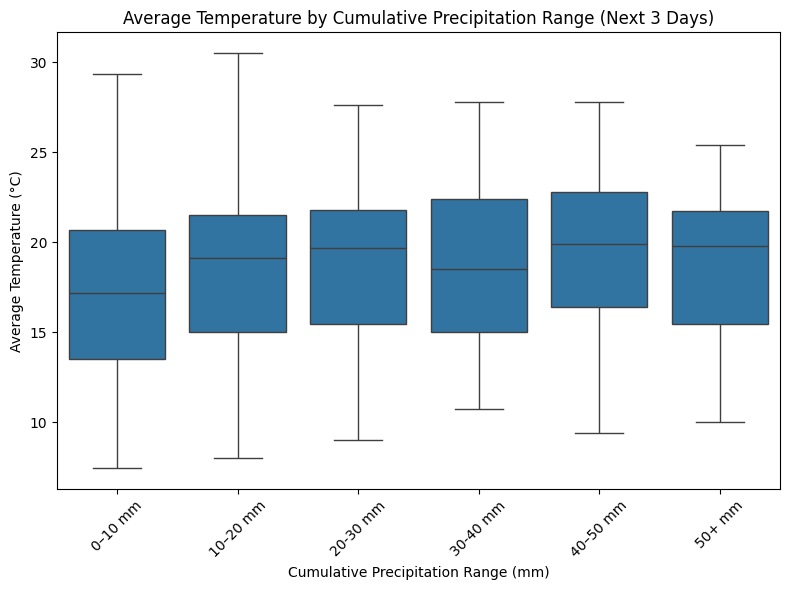

In [153]:
# Define bins for precipitation ranges
bins = [0, 10, 20, 30, 40, 50, df['precipitation_fall'].max()]
labels = ['0–10 mm', '10–20 mm', '20-30 mm', '30-40 mm', '40–50 mm', '50+ mm']

# Categorize precipitation fall into bins
df['precip_bin'] = pd.cut(df['precipitation_fall'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of average temperature by precipitation bin
plt.figure(figsize=(8,6))
sns.boxplot(x='precip_bin', y='temperature_2m_mean', data=df)

plt.title('Average Temperature by Cumulative Precipitation Range (Next 3 Days)')
plt.xlabel('Cumulative Precipitation Range (mm)')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [154]:
feature_1_insights = """When precipitation fall is categorised into finer bins such as 0 to 10 mm, 10 to 20 mm, 20 to 30 mm, 30 to 40 mm, 40 to 50 mm and 50 plus mm, the median average temperature tends to increase slightly as precipitation increases from 0 up to 30 mm. This suggests that warmer temperatures are generally associated with moderate increases in upcoming precipitation. However, this trend changes for the high precipitation category above 30 mm, where the median temperature is noticeably lower or similar to the preceding bins. This deviation is also reflected in the maximum temperatures, with the highest precipitation category showing significantly lower maximum temperatures compared to all other groups. This pattern indicates that heavy precipitation events tend to coincide with or possibly cause lower temperature extremes, which might be influenced by seasonal factors, cloud cover, or the cooling effects of sustained rainfall.
"""

In [155]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `relative_humidity_2m_mean`

In [156]:
df['relative_humidity_2m_mean'].describe()

count    4015.000000
mean       73.045677
std        11.023757
min        23.854151
25%        66.642284
50%        74.895699
75%        81.205551
max        95.974464
Name: relative_humidity_2m_mean, dtype: float64

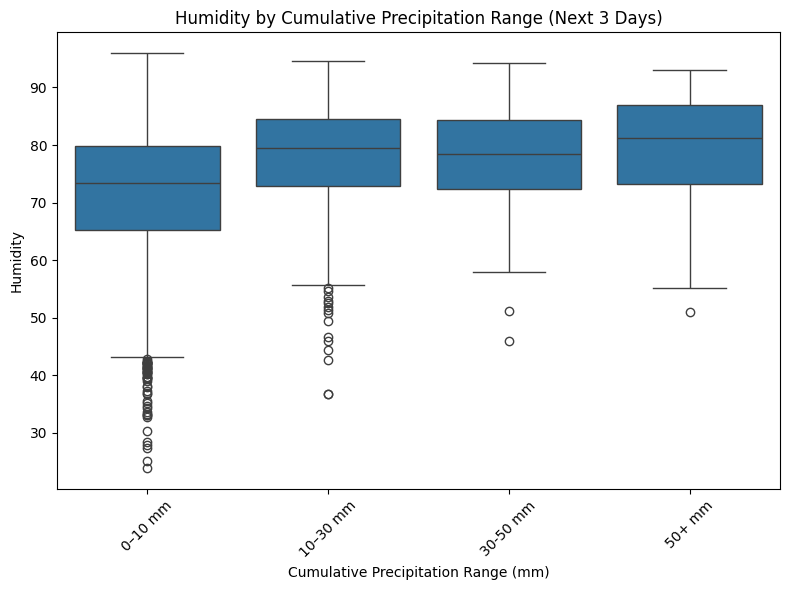

In [157]:
# Define bins for precipitation ranges
bins = [0, 10, 30, 50, df['precipitation_fall'].max()]
labels = ['0–10 mm', '10–30 mm', '30-50 mm', '50+ mm']

# Categorize precipitation fall into bins
df['precip_bin'] = pd.cut(df['precipitation_fall'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of humidity by precipitation bin
plt.figure(figsize=(8,6))
sns.boxplot(x='precip_bin', y='relative_humidity_2m_mean', data=df)

plt.title('Humidity by Cumulative Precipitation Range (Next 3 Days)')
plt.xlabel('Cumulative Precipitation Range (mm)')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [158]:
feature_2_insights = """When precipitation fall is categorised into broader bins such as 0–10 mm, 10–30 mm, 30–50 mm and 50+ mm, distinct differences emerge in precipitation and humidity distributions. In the lowest precipitation category (0–10 mm), both the interquartile range and minimum humidity values are generally lower, with more data points concentrated at the lower end of the humidity scale, indicating drier conditions. As precipitation increases to higher categories, humidity tends to rise, showing higher median and interquartile range values. This suggests that greater upcoming precipitation is associated with higher ambient humidity levels.
"""

In [159]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `cloud_cover_mean `


In [160]:
df['cloud_cover_mean'].describe()

count    4015.000000
mean       48.293407
std        29.239363
min         0.000000
25%        24.541666
50%        47.375000
75%        71.708336
max       100.000000
Name: cloud_cover_mean, dtype: float64

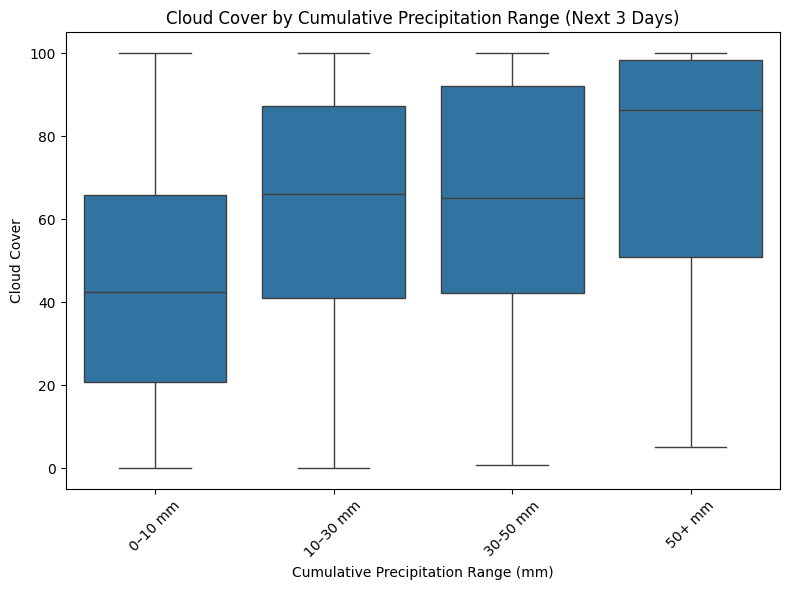

In [161]:
# Define bins for precipitation ranges
bins = [0, 10, 30, 50, df['precipitation_fall'].max()]
labels = ['0–10 mm', '10–30 mm', '30-50 mm', '50+ mm']

# Categorize precipitation fall into bins
df['precip_bin'] = pd.cut(df['precipitation_fall'], bins=bins, labels=labels, include_lowest=True)

# Plot boxplot of cloud cover by precipitation bin
plt.figure(figsize=(8,6))
sns.boxplot(x='precip_bin', y='cloud_cover_mean', data=df)

plt.title('Cloud Cover by Cumulative Precipitation Range (Next 3 Days)')
plt.xlabel('Cumulative Precipitation Range (mm)')
plt.ylabel('Cloud Cover')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [162]:
feature_3_insights = """It is clear that cloud cover and precipitation fall have a relationship. Since most precipitation fall values are less than 10 mm, the interquartile range of cloud cover in this group is significantly lower than in the others. In contrast, for precipitation fall larger than 50 mm, cloud cover shows a notably higher median value. This indicates that heavier precipitation is generally associated with greater cloud cover.
"""

In [163]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

---
## D. Feature Selection


### D.1 Approach "Correlation Analysis"


In [164]:
df.drop(columns=['precip_bin'], inplace=True)

In [165]:
# Parameter
target_col = 'precipitation_fall'
corr_threshold = 0.90  # Threshold for highly correlated features

# Plot correlation heatmap of all features 
def plot_correlation_heatmap(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(24, 20))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Features', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Print correlation of all features with target 
def print_target_correlation(data, target):
    target_corr = data.corr()[target].sort_values(ascending=False)
    print(f"Correlation of features with target '{target}':")
    print(target_corr)
    return target_corr

# Identify and drop highly correlated features based on target correlation
def drop_highly_correlated_features(data, target, threshold):
    numerical_features = data.select_dtypes(include='number').drop(columns=[target])
    corr_matrix = numerical_features.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    target_corr = data[numerical_features.columns].apply(lambda col: data[target].corr(col))

    to_drop = set()
    correlated_pairs = upper.stack().loc[lambda x: x > threshold].index.tolist()
    for col1, col2 in correlated_pairs:
        if col1 in to_drop or col2 in to_drop:
            continue
        if abs(target_corr[col1]) > abs(target_corr[col2]):
            to_drop.add(col2)
        else:
            to_drop.add(col1)

    reduced_df = data.drop(columns=to_drop)
    print(f"Dropped {len(to_drop)} features due to high correlation above {threshold}:")
    print(to_drop)
    return reduced_df, to_drop

# Find and display highly correlated feature pairs
def find_highly_correlated_pairs(data, target, threshold):
    numerical_df = data.select_dtypes(include='number').drop(columns=[target])
    corr_matrix = numerical_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    high_corr_pairs = [
        (col1, col2, upper.loc[col1, col2])
        for col1 in upper.columns
        for col2 in upper.index
        if pd.notnull(upper.loc[col1, col2]) and upper.loc[col1, col2] > threshold
    ]
    
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False).reset_index(drop=True)
    
    print(f"Highly correlated feature pairs (|corr| > {threshold}):")
    print(high_corr_df)
    
    return high_corr_df

In [166]:
# Print correlations with target
target_correlations = print_target_correlation(df, target_col)

Correlation of features with target 'precipitation_fall':
precipitation_fall                1.000000
cloud_cover_min                   0.309393
rain_sum                          0.288623
cloud_cover_mean                  0.267811
relative_humidity_2m_min          0.222063
relative_humidity_2m_mean         0.213962
dew_point_2m_mean                 0.203548
dew_point_2m_min                  0.201503
dew_point_2m_max                  0.189820
soil_moisture_0_to_7cm_mean       0.159036
temperature_2m_min                0.157035
relative_humidity_2m_max          0.135372
cloud_cover_max                   0.132821
temperature_2m_mean               0.117781
soil_moisture_7_to_28cm_mean      0.104120
date                              0.082748
daylight_duration                 0.064772
wind_gusts_10m_min                0.054379
temperature_2m_max                0.054204
wind_speed_10m_min                0.047273
wind_speed_10m_mean               0.041008
wind_gusts_10m_mean               0.038

In [167]:
# Drop highly correlated features
df_reduced, dropped_features = drop_highly_correlated_features(df, target_col, corr_threshold)

Dropped 9 features due to high correlation above 0.9:
{'pressure_msl_mean', 'temperature_2m_max', 'temperature_2m_mean', 'wind_speed_10m_min', 'dew_point_2m_max', 'dew_point_2m_min', 'wind_gusts_10m_max', 'pressure_msl_min', 'wind_gusts_10m_mean'}


In [168]:
# Display pairs of highly correlated features before dropping
high_corr_pairs_df = find_highly_correlated_pairs(df, target_col, corr_threshold)

Highly correlated feature pairs (|corr| > 0.9):
             Feature_1            Feature_2  Correlation
0    pressure_msl_mean     pressure_msl_min     0.986279
1  wind_speed_10m_mean  wind_gusts_10m_mean     0.977384
2    pressure_msl_mean     pressure_msl_max     0.975997
3    dew_point_2m_mean     dew_point_2m_min     0.968908
4    dew_point_2m_mean     dew_point_2m_max     0.967531
5   wind_gusts_10m_max   wind_speed_10m_max     0.950444
6     pressure_msl_max     pressure_msl_min     0.935273
7  temperature_2m_mean   temperature_2m_min     0.927983
8  temperature_2m_mean   temperature_2m_max     0.908907
9   wind_speed_10m_min   wind_gusts_10m_min     0.906698


In [169]:
feature_selection_1_insights = """The correlation analysis begins by computing and visualising the correlation matrix of all numerical features through a heatmap, allowing for easy identification of relationships between variables. Subsequently, the correlation of each feature with the target variable, precipitation fall, is printed and sorted to highlight the most influential predictors. To reduce multicollinearity and improve model robustness, highly correlated features (above a specified threshold of 0.90) are identified and selectively dropped. The decision on which feature to drop is based on their absolute correlation with the target variable—features less strongly correlated with the target are removed to retain the most relevant information. Additionally, pairs of features exhibiting high correlation above the threshold are explicitly listed, offering insights into potential redundancy within the dataset. This systematic approach helps streamline the feature set, minimising redundancy and enhancing the predictive power of the model.
"""

In [170]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## E. Data Preparation

In [171]:
df_clean = df_reduced.copy()
df_clean

,date,daylight_duration,sunshine_duration,temperature_2m_min,et0_fao_evapotranspiration_sum,wind_speed_10m_mean,relative_humidity_2m_mean,relative_humidity_2m_max,dew_point_2m_mean,soil_moisture_0_to_7cm_mean,...,wind_gusts_10m_min,relative_humidity_2m_min,wind_direction_10m_dominant,wind_speed_10m_max,cloud_cover_mean,cloud_cover_max,cloud_cover_min,rain_sum,pressure_msl_max,precipitation_fall
0,2013-12-31 14:00:00+00:00,51688.320312,36944.875000,19.070499,5.013660,9.695022,74.283485,88.191528,17.216333,0.097125,...,6.480000,56.672028,50.980602,19.721298,90.625000,100.0,41.0,0.4,1016.599976,0.9
1,2014-01-01 14:00:00+00:00,51655.121094,23192.041016,21.020500,4.933341,11.873059,67.645233,86.262321,17.212168,0.086083,...,11.159999,29.363708,252.678192,23.141029,90.500000,100.0,1.0,0.0,1007.500000,1.0
2,2014-01-02 14:00:00+00:00,51619.085938,27951.164062,20.220501,3.671144,9.800845,77.378288,92.547340,17.741335,0.084500,...,6.480000,66.893669,70.074326,17.902534,51.583332,100.0,0.0,0.9,1007.299988,0.2
3,2014-01-03 14:00:00+00:00,51580.242188,48363.488281,19.570499,5.142480,11.526123,72.630409,94.254036,16.226751,0.079625,...,8.640000,55.943367,135.078217,18.057508,12.416667,69.0,0.0,0.0,1009.099976,0.8
4,2014-01-04 14:00:00+00:00,51538.632812,48069.636719,19.220501,5.226202,10.935773,73.512062,85.453674,17.326750,0.075750,...,8.280000,54.870174,48.845158,26.795223,21.625000,66.0,0.0,0.1,1010.500000,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,2024-12-23 14:00:00+00:00,51848.464844,48610.832031,15.837500,6.487644,12.891021,47.542118,73.028931,8.020833,0.040542,...,11.879999,34.091835,184.936935,22.732082,5.791667,89.0,0.0,0.0,1015.700012,0.8
4011,2024-12-24 14:00:00+00:00,51837.652344,48601.023438,16.137499,6.146514,9.999595,64.223015,89.617271,13.904166,0.040417,...,5.760000,40.663586,57.746136,20.690605,0.916667,8.0,0.0,0.0,1017.700012,1.7
4012,2024-12-25 14:00:00+00:00,51823.750000,48000.613281,16.837500,6.264203,15.707917,74.374580,99.369675,17.331251,0.040542,...,5.400000,52.313023,37.269981,28.227304,13.125000,99.0,0.0,0.0,1016.299988,1.7
4013,2024-12-26 14:00:00+00:00,51806.777344,33789.968750,20.887499,6.296452,16.679815,57.966953,83.898361,16.254166,0.041875,...,22.680000,27.073923,339.781250,24.012972,43.500000,100.0,0.0,0.8,1007.299988,1.2


---
## F. Feature Engineering

### F.1 New Feature "wind_direction_10m_dominant"

In [172]:
#Statistics of wind_direction_10m_dominant
df_clean['wind_direction_10m_dominant'].describe()

count    4015.000000
mean      180.618423
std       104.395622
min         0.100736
25%        79.072670
50%       183.833603
75%       273.463623
max       359.857452
Name: wind_direction_10m_dominant, dtype: float64

In [173]:
# Convert degrees to radians
df_clean['wind_direction_rad'] = np.deg2rad(df_clean['wind_direction_10m_dominant'])

# Create sine and cosine components
df_clean['wind_direction_sin'] = np.sin(df_clean['wind_direction_rad'])
df_clean['wind_direction_cos'] = np.cos(df_clean['wind_direction_rad'])

# Drop wind_direction_10m_dominant and wind_direction_rad
df_clean.drop(columns=['wind_direction_10m_dominant', 'wind_direction_rad'], inplace=True)

In [174]:
feature_engineering_1_explanations = """The feature wind_direction_10m_dominant ranges from 0° to 360°, but its linear representation can mislead machine learning models, which may treat 0° and 360° as opposite directions. To address this, the angle is converted to radians and transformed into two continuous features using sine and cosine. This maps the data onto the unit circle, preserving its circular nature and enabling the model to better capture directional continuity for improved predictions.
"""

In [175]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "Cyclical features month, week and day"

In [176]:
# Month
df_clean['month'] = df_clean['date'].dt.month

In [177]:
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month'] / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month'] / 12)

In [178]:
df_clean.drop(columns=['month'], inplace=True)

In [179]:
# Week
df_clean["week"] = df_clean["date"].dt.isocalendar().week

In [180]:
df_clean["week_sin"] = np.sin(2 * np.pi * df_clean["week"] / 52)
df_clean["week_cos"] = np.cos(2 * np.pi * df_clean["week"] / 52)

In [181]:
df_clean.drop(columns=['week'], inplace=True)

In [182]:
# Day
df_clean['day_of_year'] = df_clean['date'].dt.dayofyear

# Cyclical encoding
df_clean['day_of_year_sin'] = np.sin(2 * np.pi * df_clean['day_of_year'] / 365)
df_clean['day_of_year_cos'] = np.cos(2 * np.pi * df_clean['day_of_year'] / 365)

In [183]:
df_clean.drop(columns=['day_of_year'], inplace=True)

In [184]:
feature_engineering_2_explanations = """Extracting temporal features such as month, week and day of year from the date column is crucial because rainfall patterns are strongly influenced by seasonal cycles and recurring temporal trends. To accurately capture their cyclical nature, these features are transformed using sine and cosine functions. This cyclical encoding enables the model to understand that time points like December and January, despite being numerically far apart, are actually adjacent in the yearly cycle. The month feature captures broad seasonal variations, while week and day-of-year features provide more detailed granularity on shorter-term temporal changes within seasons. By incorporating these cyclical time-based features, the model is better positioned to learn and predict how seasonal and temporal patterns impact precipitation behaviour.
"""

In [185]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "Lag Features (Rain Fall from the Past 3 Days)" and "Rolling Features"

In [186]:
# Create lag features for the past 3 days
for i in range(1, 4): 
    df_clean[f'rain_sum_lag_{i}'] = df_clean['rain_sum'].shift(i)

In [187]:
# Rolling features (with shift to avoid leakage)
for window in [3, 5, 7]:
    df_clean[f'rain_sum_sum_last_{window}d'] = df_clean['rain_sum'].shift(1).rolling(window).sum()
    df_clean[f'rain_sum_mean_last_{window}d'] = df_clean['rain_sum'].shift(1).rolling(window).mean()

In [188]:
# Max and Min rainfall over the last 3 days (no leakage)
df_clean['rain_sum_max_last_3d'] = df_clean['rain_sum'].shift(1).rolling(3).max()
df_clean['rain_sum_min_last_3d'] = df_clean['rain_sum'].shift(1).rolling(3).min()

In [189]:
# Binary flag: heavy rain (>10 mm) in past 3 days
df_clean['heavy_rain_flag_last_3d'] = (df_clean['rain_sum'].shift(1).rolling(3).max() > 10).astype(int)

In [190]:
# Drop rows with any NaNs created by rolling/shift
df_clean = df_clean.dropna().reset_index(drop=True)

In [191]:
feature_engineering_3_explanations = """Features such as rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3 are created to capture rainfall amounts from the previous three days, providing the model with important context on recent precipitation patterns. In addition, rolling window features, including sums, means, maximums and minimums of rainfall over the past 3, 5 and 7 days (calculated with a one-day shift to prevent data leakage), are engineered to capture short to medium term trends. For example, the binary flag heavy_rain_flag_last_3d indicates whether there was heavy rain (exceeding 10 mm) in the past three days. These lagged and rolling features enable the model to better understand recent weather dynamics and the buildup of precipitation events, ultimately improving its ability to predict cumulative rainfall over the upcoming three day period.
"""

In [192]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### G.1 Split Datasets

In [193]:
# Create copies of df_clean for modeling
df_eng = df_clean.copy()

In [194]:
# Create splits based on date ranges
train_df = df_eng[df_eng['date'] < '2023-01-01']
val_df   = df_eng[(df_eng['date'] >= '2023-01-01') & (df_eng['date'] < '2024-01-01')]
test_df  = df_eng[(df_eng['date'] >= '2024-01-01') & (df_eng['date'] < '2025-01-01')]

In [195]:
# Drop date column
train_df.drop(columns=['date'], inplace= True)
val_df.drop(columns=['date'], inplace= True)
test_df.drop(columns=['date'], inplace= True)

In [196]:
# Define the target variable and remove it
y_train = train_df.pop(target_name)
X_train = train_df

y_val = val_df.pop(target_name)
X_val = val_df

y_test = test_df.pop(target_name)
X_test = test_df

In [197]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3281, 40)
(3281,)
(365, 40)
(365,)
(362, 40)
(362,)


In [198]:
data_splitting_explanations = """Given that precipitation forecasting is a time-series prediction task, the application of conventional data partitioning techniques such as random sampling or stratified sampling is inappropriate. These methods may introduce data leakage by allowing future observations to influence the training process, thereby compromising the validity of model evaluation. To preserve the temporal structure of the data and maintain the integrity of the modeling process, a chronological data-splitting strategy is employed. In this approach, data collected prior to the year 2023 is assigned to the training dataset, data from the full year of 2023 is used for validation, and data from the year 2024 is reserved for testing. This sequential partitioning reflects realistic forecasting scenarios, where models are trained exclusively on historical data and evaluated based on their ability to generalise to future, unseen conditions.
"""

In [199]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Build Pipeline for Data Transformation "Scaling"

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [201]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3281 entries, 0 to 3280
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daylight_duration               3281 non-null   float32
 1   sunshine_duration               3281 non-null   float32
 2   temperature_2m_min              3281 non-null   float32
 3   et0_fao_evapotranspiration_sum  3281 non-null   float32
 4   wind_speed_10m_mean             3281 non-null   float32
 5   relative_humidity_2m_mean       3281 non-null   float32
 6   relative_humidity_2m_max        3281 non-null   float32
 7   dew_point_2m_mean               3281 non-null   float32
 8   soil_moisture_0_to_7cm_mean     3281 non-null   float32
 9   soil_moisture_28_to_100cm_mean  3281 non-null   float32
 10  soil_moisture_7_to_28cm_mean    3281 non-null   float32
 11  vapour_pressure_deficit_max     3281 non-null   float32
 12  wind_gusts_10m_min              3281 no

In [202]:
X_train.columns

Index(['daylight_duration', 'sunshine_duration', 'temperature_2m_min',
       'et0_fao_evapotranspiration_sum', 'wind_speed_10m_mean',
       'relative_humidity_2m_mean', 'relative_humidity_2m_max',
       'dew_point_2m_mean', 'soil_moisture_0_to_7cm_mean',
       'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean',
       'vapour_pressure_deficit_max', 'wind_gusts_10m_min',
       'relative_humidity_2m_min', 'wind_speed_10m_max', 'cloud_cover_mean',
       'cloud_cover_max', 'cloud_cover_min', 'rain_sum', 'pressure_msl_max',
       'wind_direction_sin', 'wind_direction_cos', 'month_sin', 'month_cos',
       'week_sin', 'week_cos', 'day_of_year_sin', 'day_of_year_cos',
       'rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3',
       'rain_sum_sum_last_3d', 'rain_sum_mean_last_3d', 'rain_sum_sum_last_5d',
       'rain_sum_mean_last_5d', 'rain_sum_sum_last_7d',
       'rain_sum_mean_last_7d', 'rain_sum_max_last_3d', 'rain_sum_min_last_3d',
       'heavy_rain_flag_last_3d'

In [203]:
# Identify the numerical columns 
num_cols = ['daylight_duration', 'sunshine_duration', 'temperature_2m_min',
       'et0_fao_evapotranspiration_sum', 'wind_speed_10m_mean',
       'relative_humidity_2m_mean', 'relative_humidity_2m_max',
       'dew_point_2m_mean', 'soil_moisture_0_to_7cm_mean',
       'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean',
       'vapour_pressure_deficit_max', 'wind_gusts_10m_min',
       'relative_humidity_2m_min', 'wind_speed_10m_max', 'cloud_cover_mean',
       'cloud_cover_max', 'cloud_cover_min', 'rain_sum', 'pressure_msl_max',
       'rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3',
       'rain_sum_sum_last_3d', 'rain_sum_mean_last_3d', 'rain_sum_sum_last_5d',
       'rain_sum_mean_last_5d', 'rain_sum_sum_last_7d',
       'rain_sum_mean_last_7d', 'rain_sum_max_last_3d', 'rain_sum_min_last_3d']

# The cyclic features 
passthrough_cols = ['heavy_rain_flag_last_3d', 'month_sin', 'month_cos', 'wind_direction_sin', 'wind_direction_cos', 'week_sin', 'week_cos', 'day_of_year_sin', 'day_of_year_cos']

# Define the transformers
numeric_transformer = StandardScaler()

# Compose column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('passthrough', 'passthrough', passthrough_cols)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit_transform on training dataset
X_train_processed = pipeline.fit_transform(X_train)

# For validation/testing dataset, only transform
X_val_processed = pipeline.transform(X_val)
X_test_processed = pipeline.transform(X_test)

# Convert back to DataFrame with proper column names 
# Get column names for numeric + passthrough
num_features = num_cols
passthrough_features = passthrough_cols

all_features = list(num_features) + list(passthrough_features)

X_train_df = pd.DataFrame(X_train_processed, columns=all_features, index=X_train.index)
X_val_df = pd.DataFrame(X_val_processed, columns=all_features, index=X_val.index)
X_test_df = pd.DataFrame(X_test_processed, columns=all_features, index=X_test.index)

In [204]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3281 entries, 0 to 3280
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   daylight_duration               3281 non-null   object
 1   sunshine_duration               3281 non-null   object
 2   temperature_2m_min              3281 non-null   object
 3   et0_fao_evapotranspiration_sum  3281 non-null   object
 4   wind_speed_10m_mean             3281 non-null   object
 5   relative_humidity_2m_mean       3281 non-null   object
 6   relative_humidity_2m_max        3281 non-null   object
 7   dew_point_2m_mean               3281 non-null   object
 8   soil_moisture_0_to_7cm_mean     3281 non-null   object
 9   soil_moisture_28_to_100cm_mean  3281 non-null   object
 10  soil_moisture_7_to_28cm_mean    3281 non-null   object
 11  vapour_pressure_deficit_max     3281 non-null   object
 12  wind_gusts_10m_min              3281 non-null   objec

In [205]:
# Convert all columns to numeric float type
X_train_df = X_train_df.astype('float32')
X_val_df = X_val_df.astype('float32')
X_test_df = X_test_df.astype('float32')

In [206]:
data_transformation_1_explanations = """Since all input variables, except for cyclical features and binary flags, are numerical, it is essential to standardise them before modeling to ensure they are on a consistent scale and comparable across features. Standardisation transforms numerical features to have a mean of zero and a standard deviation of one, which is a critical preprocessing step. This scaling prevents models from being biased toward features with larger ranges, improves numerical stability, accelerates convergence during training, and ultimately enhances predictive accuracy. Cyclical features and binary flags are left unchanged in their original form because their current representations are already suitable for modeling and do not require scaling. Finally, converting all processed features to float32 ensures compatibility and computational efficiency during model training.
"""

In [207]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets

> Do not change this code

In [208]:
from pathlib import Path

# Create the path to the folder
path = Path.home() / "Desktop" / "36120" / "assignment2"/"Regression"

In [209]:
# Do not modify this code
# Save training set
try:
  X_train_df.to_csv(path / 'X_train.csv', index=False)
  y_train.to_csv(path / 'y_train.csv', index=False)

  X_val_df.to_csv(path / 'X_val.csv', index=False)
  y_val.to_csv(path / 'y_val.csv', index=False)

  X_test_df.to_csv(path / 'X_test.csv', index=False)
  y_test.to_csv(path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [211]:
performance_metrics_explanations = """In this assignment, RMSE, MAE and R-squared are used as evaluation metrics. RMSE is particularly useful because it shares the same units as the target variable (precipitation in millimeters), making the magnitude of errors easy to interpret. However, RMSE penalises larger errors more heavily by taking the square root of the average squared errors, which helps highlight significant deviations in precipitation forecasts. This sensitivity can sometimes lead to larger RMSE values, especially in cases of class imbalance where extreme values occur less frequently. Hence, MAE is preferred as it provides a more balanced measure by treating all errors linearly, making it less sensitive to outliers and extreme values. Additionally, R-squared is included to quantify the proportion of variance in the observed data explained by the model, providing valuable insight into the overall goodness of fit and facilitating a comprehensive evaluation of model performance. However, R-squared can be affected by class imbalance, which impacts its interpretation in datasets with uneven distributions of rainfall events. When the dataset contains many more low rainfall events than high rainfall events, the model may perform well on the majority but poorly on the minority. Since R-squared is based on the overall variance explained, poor predictions on rare but extreme rainfall events can increase residual errors disproportionately, sometimes resulting in low or even negative R-squared values.
"""

In [212]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null hypothesis: 
1) The performance of the XGBoost is not significantly better than that of the baseline model.
2) The performance of the XGBoost with feature selection is not significantly better than that of XGBoost using all features.

Alternative hypothesis: 
1) The performance of the XGBoost is significantly better than that of the baseline model.
2) The performance of the XGBoost with feature selection is significantly better than that of XGBoost using all features.

### J.1 Import Algorithm

In [213]:
from sklearn.dummy import DummyRegressor

In [214]:
# Initialise the dummy regressor
dummy = DummyRegressor(strategy='mean')

In [215]:
from xgboost import XGBRegressor
import xgboost as xgb

In [216]:
xgb = XGBRegressor(random_state=12)

In [217]:
algorithm_selection_explanations = """The Dummy Regressor is selected as the baseline model to provide a reference point against which the performance of more advanced predictive models can be compared. This baseline helps to determine whether the more complex models capture meaningful patterns beyond simple heuristic predictions. XGBoost is considered a suitable choice because it builds an ensemble of weak learners sequentially, where each new tree focuses on correcting the errors made by the previous ones. This boosting technique improves predictive accuracy across iterations, making it well-suited for complex regression tasks. In addition, XGBoost offers a wide range of hyperparameters that can be tuned to better capture nonlinear relationships in the data. It also provides feature importance scores, which can offer valuable insights into the most influential variables in the prediction process.
"""

In [218]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [219]:
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [200],
    'max_depth': [3],
    'subsample': [0.3],
    'colsample_bytree': [0.7],
    'min_child_weight': [12]
}

# param_grid = {
#     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 400, 600, 700, 800],
#     'max_depth': [3, 4, 5, 6, 7, 8],
#     'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
#     'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
#     'min_child_weight': [1, 3, 6, 10, 11, 12, 13, 14, 15]
# }

In [220]:
hyperparameters_selection_explanations = """The n_estimators parameter determines how many trees are used in the ensemble, directly influencing the model’s ability to capture patterns in the data. The learning_rate controls how much each tree contributes to the final prediction, with lower values slow the learning process but help prevent overfitting. The max_depth parameter sets a limit on how deep each tree can grow, helping to control model complexity and reduce the risk of learning from noise. Parameters such as subsample and colsample_bytree introduce randomness by restricting the fraction of training instances and features used for each tree, which enhances the model’s generalisation ability and mitigates overfitting. Lastly, min_child_weight specifies the minimum sum of instance weights required in a leaf node, acting as a form of regularisation that prevents the model from capturing overly specific patterns in the data.
"""

In [221]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [222]:
# Fit the model on the training dataset
dummy.fit(X_train_df, y_train)

DummyRegressor()

In [223]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [224]:
# Transform target
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

In [225]:
print(X_train_df.shape, y_train_log.shape)
print(X_val_df.shape, y_val.shape)
print(X_test_df.shape, y_test.shape)

(3281, 40) (3281,)
(365, 40) (365,)
(362, 40) (362,)


In [226]:
# Time series split
tscv = TimeSeriesSplit(n_splits=5)

# Scoring metrics
scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scoring,
    refit='neg_mean_absolute_error',
    cv=tscv,
    n_jobs=-1,
)

# Fit model
grid_search.fit(X_train_df, y_train_log)

print("Best parameters:", grid_search.best_params_)

best_mae = -grid_search.best_score_
print(f"Best MAE: {best_mae:.4f}")

best_r2 = grid_search.cv_results_['mean_test_r2'][grid_search.best_index_]
print(f"Best R2: {best_r2:.4f}")

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 12, 'n_estimators': 200, 'subsample': 0.3}
Best MAE: 0.9051
Best R2: 0.1258


### J.4 Model Technical Performance

In [227]:
from my_krml_25677648.models.performance import get_predictions, print_regressor_scores

#### Dummy Model

In [228]:
# Validation
y_val_pred = get_predictions(dummy, X_val_df)
print_regressor_scores(y_val_pred, y_val, set_name="Validation")

RMSE (Validation): 11.084
MAE (Validation): 7.688
R² (Validation): -0.003


In [229]:
# Testing
y_test_pred = get_predictions(dummy, X_test_df)
print_regressor_scores(y_test_pred, y_test, set_name="Testing")

RMSE (Testing): 14.777
MAE (Testing): 9.208
R² (Testing): -0.006


#### XGBoost

In [230]:
best_model = grid_search.best_estimator_

In [231]:
# Validation
y_val_pred_log = get_predictions(best_model, X_val_df)

# Inverse transform predictions
y_val_pred = np.expm1(y_val_pred_log)

print_regressor_scores(y_val_pred, y_val, set_name="Validation")

RMSE (Validation): 11.507
MAE (Validation): 6.205
R² (Validation): -0.081


In [232]:
# Testing
y_test_pred_log = get_predictions(best_model, X_test_df)

# Inverse transform predictions
y_test_pred = np.expm1(y_test_pred_log)

print_regressor_scores(y_test_pred, y_test, set_name="Testing")

RMSE (Testing): 15.114
MAE (Testing): 7.411
R² (Testing): -0.052


#### Feature Importance

In [233]:
# Get feature importances as a dictionary (feature_name: importance_score)
importance_dict = best_model.get_booster().get_score(importance_type='weight')

# Sort features by importance descending
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_importance

[('cloud_cover_mean', 130.0),
 ('dew_point_2m_mean', 108.0),
 ('relative_humidity_2m_mean', 81.0),
 ('cloud_cover_min', 81.0),
 ('wind_direction_sin', 75.0),
 ('rain_sum', 70.0),
 ('temperature_2m_min', 45.0),
 ('relative_humidity_2m_max', 45.0),
 ('wind_direction_cos', 45.0),
 ('daylight_duration', 43.0),
 ('day_of_year_sin', 41.0),
 ('relative_humidity_2m_min', 40.0),
 ('wind_speed_10m_max', 40.0),
 ('soil_moisture_28_to_100cm_mean', 39.0),
 ('pressure_msl_max', 36.0),
 ('soil_moisture_0_to_7cm_mean', 35.0),
 ('vapour_pressure_deficit_max', 34.0),
 ('sunshine_duration', 32.0),
 ('soil_moisture_7_to_28cm_mean', 28.0),
 ('rain_sum_sum_last_3d', 26.0),
 ('rain_sum_max_last_3d', 26.0),
 ('wind_speed_10m_mean', 22.0),
 ('rain_sum_sum_last_7d', 22.0),
 ('wind_gusts_10m_min', 20.0),
 ('cloud_cover_max', 20.0),
 ('day_of_year_cos', 18.0),
 ('week_sin', 17.0),
 ('rain_sum_sum_last_5d', 16.0),
 ('et0_fao_evapotranspiration_sum', 12.0),
 ('rain_sum_mean_last_7d', 12.0),
 ('rain_sum_lag_3', 10.0

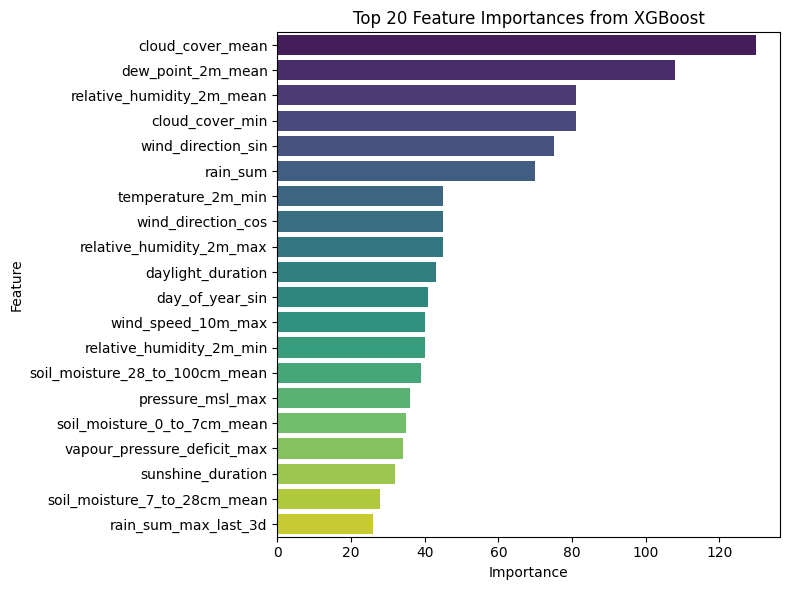

In [234]:
# Convert to DataFrame
df_importance = pd.DataFrame(
    list(importance_dict.items()), 
    columns=['Feature', 'Importance']
)

# Sort descending
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Importance', y='Feature',
    data=df_importance.head(20),
    palette='viridis'
)
plt.title('Top 20 Feature Importances from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [235]:
# Get top 20 features
top_20 = sorted_importance[:20]

# Extract feature names only
top_20_features = [feat for feat, imp in top_20]

# Select columns for training/validation/testing
X_train_top = X_train_df[top_20_features]
X_val_top = X_val_df[top_20_features]
X_test_top = X_test_df[top_20_features]

In [236]:
param_grid = {
    'learning_rate': [0.05],
    'n_estimators': [300],
    'max_depth': [3],
    'subsample': [0.9],
    'colsample_bytree': [0.4],
    'min_child_weight': [1]
}

# param_grid = {
#     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
#     'n_estimators': [300, 400, 600, 700, 800, 900, 1000],
#     'max_depth': [3, 4, 5, 6, 7, 8],
#     'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.4, 0.5, 0.7, 0.8, 1.0],
#     'min_child_weight': [1, 3, 6, 10, 11, 12, 15, 16, 17, 18, 19, 20]
# }

In [237]:
# Time series split
tscv = TimeSeriesSplit(n_splits=5)

# Scoring metrics
scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scoring,
    refit='neg_mean_absolute_error',
    cv=tscv,
    n_jobs=-1,
)

# Fit model with sample weights
grid_search.fit(X_train_top, y_train_log)

print("Best parameters:", grid_search.best_params_)

best_mae = -grid_search.best_score_
print(f"Best MAE: {best_mae:.4f}")

best_r2 = grid_search.cv_results_['mean_test_r2'][grid_search.best_index_]
print(f"Best R2: {best_r2:.4f}")

Best parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Best MAE: 0.9451
Best R2: 0.0355


In [238]:
best_model_top20 = grid_search.best_estimator_

In [239]:
# Validation
y_val_pred_log = get_predictions(best_model_top20, X_val_top)

# Inverse transform predictions
y_val_pred = np.expm1(y_val_pred_log)

print_regressor_scores(y_val_pred, y_val, set_name="Validation")

RMSE (Validation): 11.252
MAE (Validation): 6.512
R² (Validation): -0.033


In [240]:
# Testing
y_test_pred_log = get_predictions(best_model_top20, X_test_top)

# Inverse transform predictions
y_test_pred = np.expm1(y_test_pred_log)

print_regressor_scores(y_test_pred, y_test, set_name="Testing")

RMSE (Testing): 14.799
MAE (Testing): 7.392
R² (Testing): -0.009


In [241]:
# MAE for zero vs heavy rainfall days
# Thresholds
zero_threshold = 0.1  # Define zero rainfall
heavy_rain_threshold = 10.0  # Define heavy rainfall

# Separate indexes
zero_idx = y_test < zero_threshold
heavy_idx = y_test >= heavy_rain_threshold

from sklearn.metrics import mean_absolute_error

# MAE for zero rainfall days
mae_zero = mean_absolute_error(y_test[zero_idx], y_test_pred[zero_idx])
print(f"MAE on zero rainfall days: {mae_zero:.4f}")

# MAE for heavy rainfall days
mae_heavy = mean_absolute_error(y_test[heavy_idx], y_test_pred[heavy_idx])
print(f"MAE on heavy rainfall days: {mae_heavy:.4f}")

# Overall MAE
mae_overall = mean_absolute_error(y_test, y_test_pred)
print(f"Overall MAE: {mae_overall:.4f}")

MAE on zero rainfall days: 2.0447
MAE on heavy rainfall days: 21.5624
Overall MAE: 7.3915


In [242]:
# MAE per rainfall category (bins)
bins = [0, 0.1, 1, 5, 10, 50, 1000]
labels = ['None', 'Trace', 'Light', 'Moderate', 'Heavy', 'Extreme']
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)

# Compute MAE per bin
for label in labels:
    idx = y_test_bins == label
    if idx.sum() > 0:
        mae = mean_absolute_error(y_test[idx], y_test_pred[idx])
        print(f"{label} rain days - Count: {idx.sum()}, MAE: {mae:.2f}")

Trace rain days - Count: 71, MAE: 2.78
Light rain days - Count: 96, MAE: 1.89
Moderate rain days - Count: 47, MAE: 3.41
Heavy rain days - Count: 81, MAE: 15.25
Extreme rain days - Count: 13, MAE: 60.90


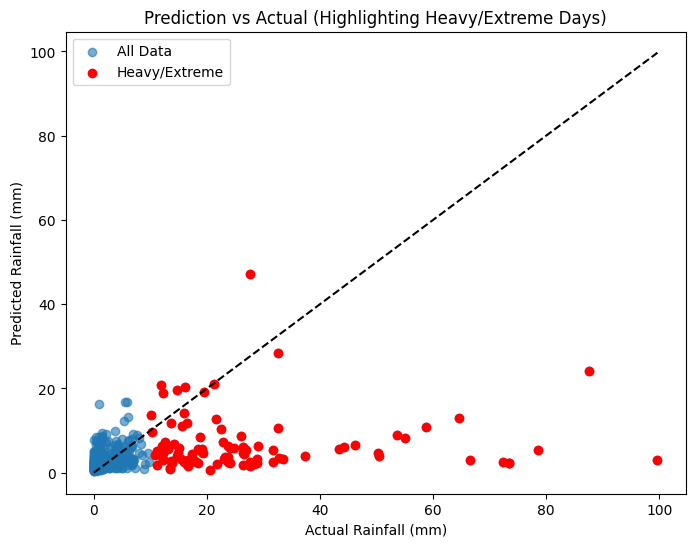

In [243]:
# Prediction vs Actual scatter with heavy/extreme highlighted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="All Data")
plt.scatter(y_test[y_test >= 10], y_test_pred[y_test >= 10], color='red', label="Heavy/Extreme")
plt.plot([0, y_test.max()], [0, y_test.max()], 'k--')
plt.xlabel("Actual Rainfall (mm)")
plt.ylabel("Predicted Rainfall (mm)")
plt.title("Prediction vs Actual (Highlighting Heavy/Extreme Days)")
plt.legend()
plt.show()

In [245]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from joblib import dump
import numpy as np

top_20_features = [
    'cloud_cover_mean',
    'cloud_cover_min',
    'day_of_year_sin',
    'daylight_duration',
    'dew_point_2m_mean',
    'pressure_msl_max',
    'rain_sum',
    'rain_sum_sum_last_3d',
    'relative_humidity_2m_max',
    'relative_humidity_2m_mean',
    'relative_humidity_2m_min',
    'soil_moisture_0_to_7cm_mean',
    'soil_moisture_28_to_100cm_mean',
    'soil_moisture_7_to_28cm_mean',
    'sunshine_duration',
    'temperature_2m_min',
    'vapour_pressure_deficit_max',
    'wind_direction_cos',
    'wind_direction_sin',
    'wind_speed_10m_max'
]

top_features_set = set(top_20_features)
numeric_cols_top = [col for col in num_cols if col in top_features_set]
passthrough_cols_top = [col for col in passthrough_cols if col in top_features_set]

preprocessor_top20 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols_top),
        ('passthrough', 'passthrough', passthrough_cols_top)
    ]
)

full_pipeline = Pipeline([
    ('preprocessor', preprocessor_top20),
    ('model', best_model_top20)
])

# Wrap with TransformedTargetRegressor for log-transform on target
regressor = TransformedTargetRegressor(
    regressor=full_pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

# Fit on raw features and raw target 
regressor.fit(X_train, y_train)

# Save the entire pipeline
dump(regressor, '../../models/precipitation_fall/precipitation_fall.joblib')

['../../models/precipitation_fall/precipitation_fall.joblib']

In [246]:
model_performance_explanations = """The model’s performance on the validation dataset shows an RMSE of 11.252 mm and an MAE of 6.512 mm, with an R² value of -0.033. On the testing dataset, the RMSE increases to 14.799 mm and the MAE to 7.392 mm, while the R² slightly improves to -0.009. The RMSE indicates the average size of prediction errors, and its higher value compared to MAE suggests the presence of some larger errors, as RMSE penalises these more heavily. The increase in error metrics from validation to testing indicates reduced accuracy on unseen data, highlighting potential limitations in the model’s ability to generalise. Negative R² values suggest the model explains less variance than a simple mean prediction, pointing to challenges in capturing the complex and imbalanced nature of precipitation data. Specifically, the predominance of low rainfall days and the rarity of heavy rainfall events make accurate prediction difficult, particularly for extremes. The low R² can largely be attributed to the model’s difficulty in accurately predicting these extreme rainfall events, which significantly affect variance but occur infrequently. Overall, while the model achieves reasonable error levels, the negative R² values indicate limited explanatory power and reduced predictive reliability across varying rainfall intensities.
"""

In [247]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [248]:
business_impacts_explanations = """The model is intended to support decision making in sectors such as agriculture, flood management and event planning by providing precipitation forecasts. Although the RMSE and MAE values indicate reasonable overall accuracy, the negative R-squared value suggests that the model has limited ability to capture rainfall variability, particularly in the case of extreme precipitation events. This limitation is significant, as inaccurate predictions of heavy rainfall, while infrequent, may lead to substantial business consequences such as crop damage, infrastructure disruption and financial losses. In contrast, prediction errors during periods of low rainfall generally carry less severe implications. Overall, the model demonstrates acceptable performance under typical conditions but lacks reliability in forecasting extreme events, which may reduce its effectiveness in supporting critical business planning and risk management activities.
"""

In [249]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [250]:
experiment_outcome = """Null Hypothesis Confirmed"""

In [251]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [252]:
experiment_results_explanations = """The null hypothesis is rejected, as the XGBoost model outperforms the baseline in terms of lower mean absolute error (MAE), and the feature-selected XGBoost model further enhances performance over the original version. The results of this experiment suggest that while the model performs reasonably well under typical rainfall conditions, it fails to generalise effectively to extreme precipitation events. The consistently negative R-squared values, particularly for heavy and extreme rainfall cases, highlight the model’s inability to capture the complexity and variability of such rare occurrences. This limitation significantly constrains the model’s utility in business-critical applications, where accurate forecasts of high-impact weather events are essential. Given the class imbalance and the inherent unpredictability of extreme rainfall, further experimentation with this modelling approach appears to offer limited value. It is therefore reasonable to consider this line of modelling a dead end in its current form. Future work should investigate more specialised, weather-focused models, which may offer improved sensitivity to rare but impactful rainfall events. While these approaches may involve greater complexity and require additional resources, they hold promise for delivering higher predictive accuracy for extreme events, thereby enhancing the model's practical value in both operational and strategic decision-making contexts.
"""

In [253]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)